Defi 20

In [1]:
# Installation des bibliothèques nécessaires pour Roboflow et YOLOv8
%pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 125.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow
import os

# --- Authentification et téléchargement ---

# Remplacez la ligne ci-dessous par votre clé API privée Roboflow
rf = Roboflow(api_key="1u46AJmZaJhgcAJhBX1P") # <--- METTEZ VOTRE CLÉ API PRIVÉE ICI

# Accès au projet et téléchargement au format YOLOv8
project = rf.workspace().project("harry-potter-character-detection-1-1sma0")
version = project.version(1)
dataset = version.download("yolov8")

# --- Récupération du chemin de configuration ---

# On récupère le chemin complet vers le fichier data.yaml
yaml_path = os.path.join(dataset.location, "data.yaml")

print("✅ Dataset prêt !")
print(f"Le fichier de configuration se trouve ici : {yaml_path}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to harry-potter-character-detection-1-1 in yolov8:: 100%|██████████| 3658/3658 [00:00<00:00, 12129.05it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Dataset prêt !
Le fichier de configuration se trouve ici : /content/harry-potter-character-detection-1-1/data.yaml


In [ ]:
from ultralytics import YOLO

# --- Chargement et entraînement du modèle ---

# Charge le modèle pré-entraîné yolov8n.pt
model = YOLO('yolov8n.pt')

# Entraînement du modèle en utilisant le chemin du fichier yaml
results = model.train(
   data=yaml_path,
   epochs=50,
   imgsz=640,
   project="resultats_harry_potter",
   name="detection_run_1"
)

print("✅ Entraînement terminé !")

Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/harry-potter-character-detection-1-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=detection_run_1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100

Exception in thread Thread-15 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.12/threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.12/threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py", line 61, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/_utils/pin_memory.py", line 37, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/multiprocessing/reductions.py", line 541, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/resource_

       2/50      2.58G      1.421      3.367        1.6         41        640: 54% ━━━━━━────── 58/108 7.1it/s 8.6s<7.0s


KeyboardInterrupt: 


image 1/1 /content/jeu_de_test/imj.jpg: 448x640 1 HARRY-POTTER, 41.9ms
Speed: 2.4ms preprocess, 41.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Résultats de la détection :


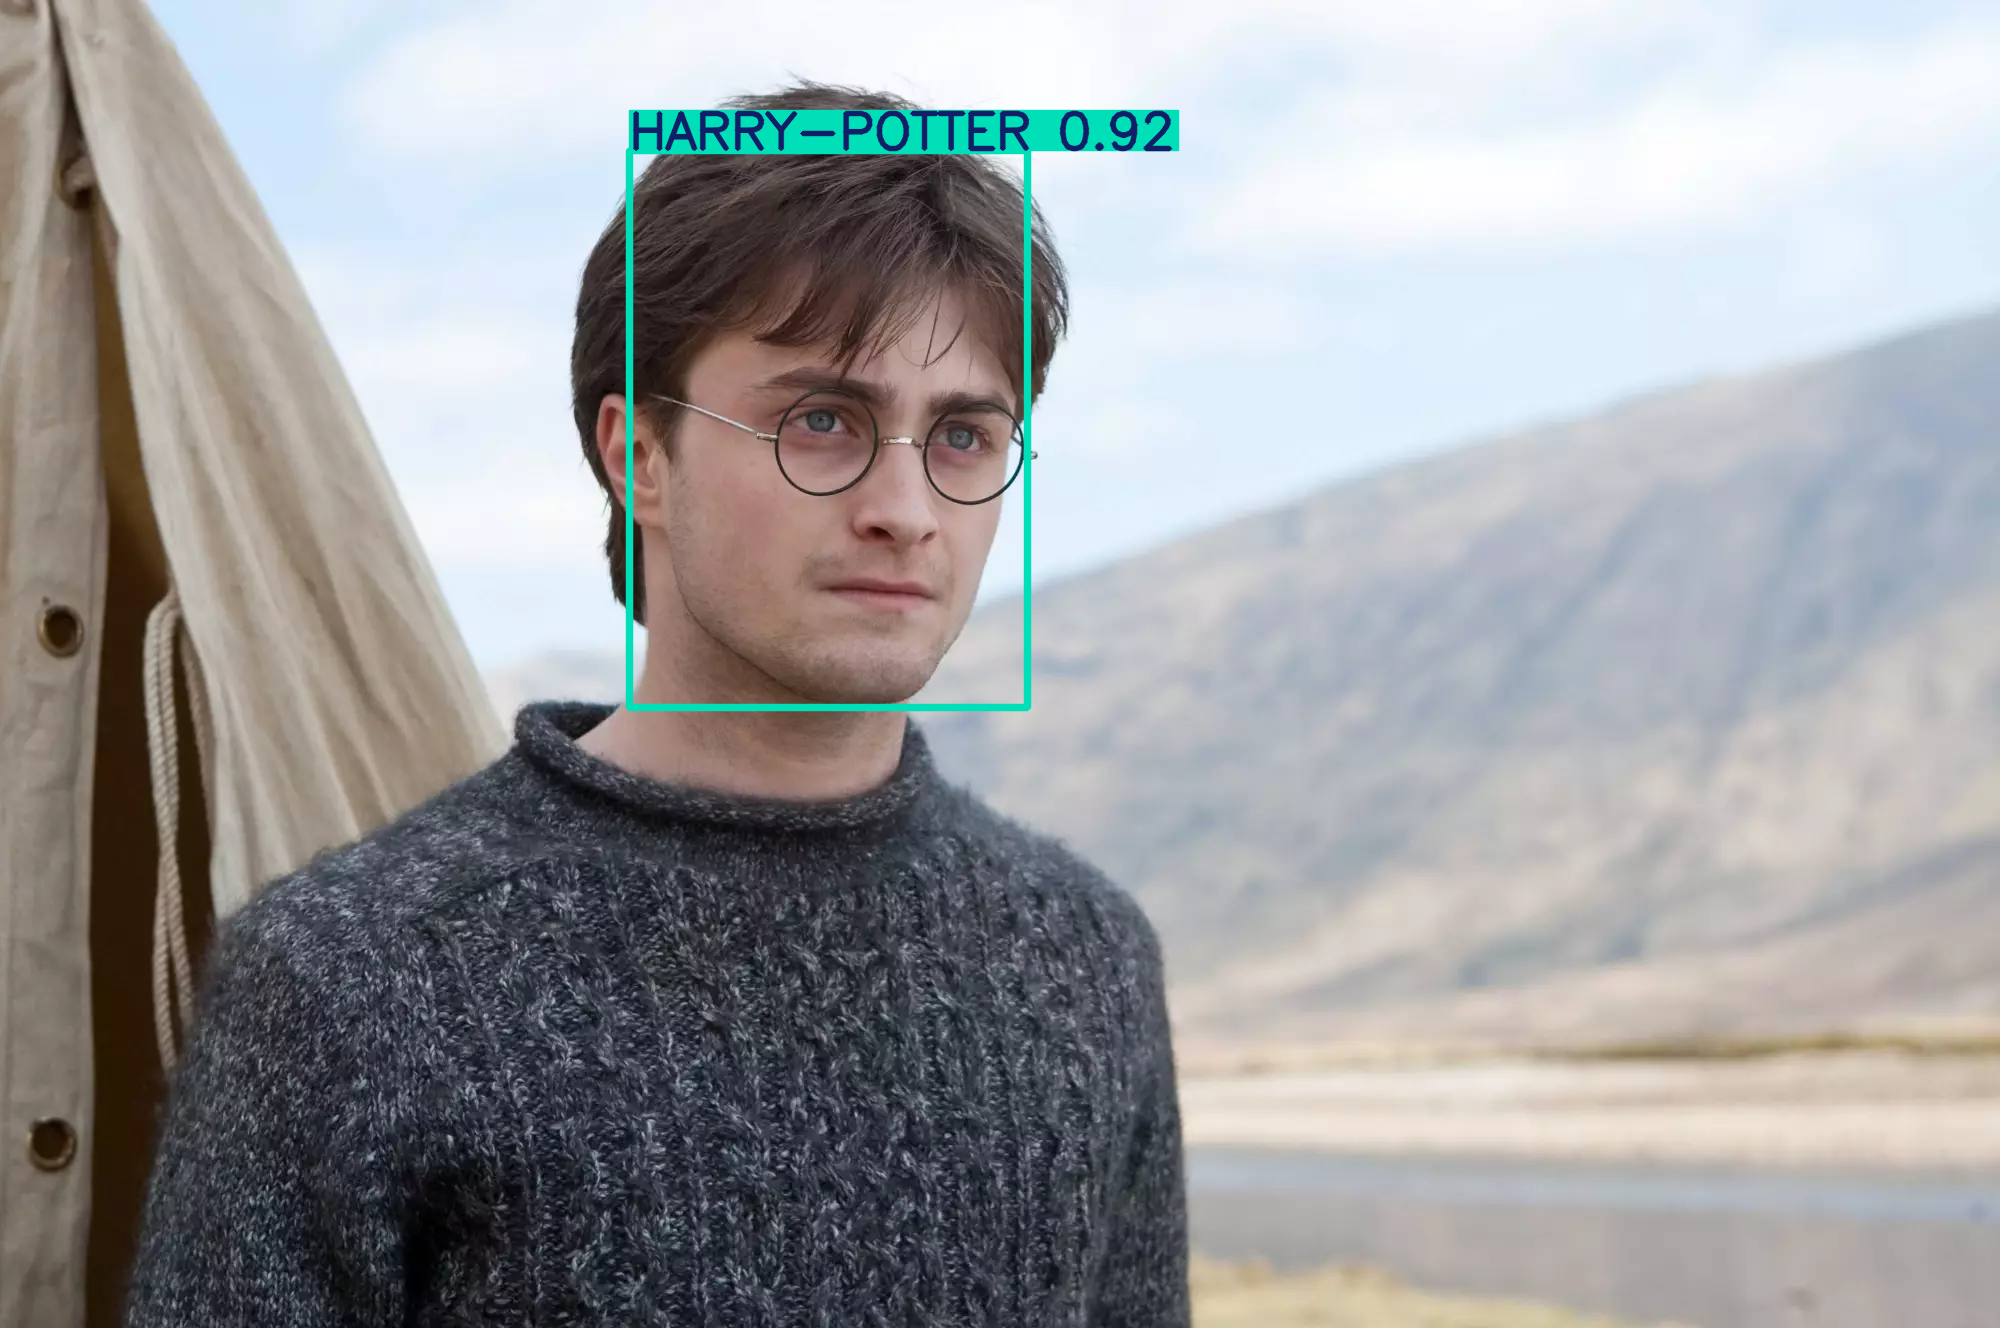

In [ ]:
from ultralytics import YOLO
from PIL import Image
import os

# --- 1. Chargement de VOTRE modèle entraîné ---

# Le chemin vers le meilleur modèle sauvegardé pendant l'entraînement
model_path = "/content/resultats_harry_potter/detection_run_1/weights/best.pt"

# On vérifie que le fichier existe bien
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Le fichier du modèle '{model_path}' est introuvable. Avez-vous bien terminé l'entraînement ?")

# On charge le modèle
model = YOLO(model_path)


# --- 2. Prédiction sur votre image ---

# Collez ici le chemin de l'image que vous avez copié à l'étape 1
source_image_path = "/content/jeu_de_test/imj.jpg" # <--- MODIFIEZ CETTE LIGNE

# On lance la prédiction
results = model.predict(source=source_image_path)


# --- 3. Affichage du résultat ---

print("Résultats de la détection :")
# On parcourt les résultats pour afficher l'image avec les détections
for result in results:
    # Cette commande dessine les boîtes de détection sur l'image
    img_with_boxes = result.plot()

    # On convertit l'image pour qu'elle s'affiche correctement dans le notebook
    img_displayable = Image.fromarray(img_with_boxes[..., ::-1])

    # On affiche l'image finale
    display(img_displayable)

defi 21

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Script pour le défi n°21 : "LE NIMBUS 3000" (Version Robuste)
----------------------------------------------------------------
Ce script réalise un benchmark de différents optimizers sur un modèle YOLOv8.
Il utilise un "callback" manuel pour garantir que les métriques de performance
sont envoyées à Weights & Biases (wandb) à la fin de chaque époque.

Auteur: Gemini
Date: 16/10/2025
"""

import wandb
from ultralytics import YOLO

# --- CONFIGURATION DU BENCHMARK ---
# Modifiez ces paramètres selon vos besoins

# ⚠️ IMPORTANT : Modifiez cette ligne pour indiquer le chemin vers le fichier .yaml
# de votre jeu de données Harry Potter.
DATASET_YAML = '/content/harry-potter-character-detection-1-1/data.yaml'

# Nom du projet sur Weights & Biases où les résultats seront sauvegardés.
WANDB_PROJECT_NAME = "Nimbus_3000_Benchmark-2"

# Modèle YOLO à utiliser. 'yolov8n.pt' est le plus petit et le plus rapide.
MODEL_TO_USE = 'yolov8n.pt'

# Nombre d'époques pour chaque entraînement.
NUM_EPOCHS = 10

# Taille des images pour l'entraînement.
IMAGE_SIZE = 640

# Liste des optimizers à tester, conformément à l'énoncé du défi.
OPTIMIZERS_TO_TEST = [
    'SGD',
    'Adam',
    'AdamW',
    'RMSProp',
    'Adagrad',
    'Adadelta',
]

def run_benchmark():
    """Fonction principale pour lancer le benchmark."""

    print("🚀 Démarrage du benchmark 'Le Nimbus 3000' (version avec callback)...")

    for optimizer_name in OPTIMIZERS_TO_TEST:
        print(f"\n{'='*50}")
        print(f"🧹 Test de l'optimizer : {optimizer_name}")
        print(f"{'='*50}")

        try:
            # 1. Initialiser une nouvelle session sur Weights & Biases
            wandb.init(
                project=WANDB_PROJECT_NAME,
                name=f"{MODEL_TO_USE.split('.')[0]}_{optimizer_name}",
                reinit=True,
                config={
                    "model": MODEL_TO_USE,
                    "optimizer": optimizer_name,
                    "epochs": NUM_EPOCHS,
                    "image_size": IMAGE_SIZE,
                    "dataset": DATASET_YAML,
                }
            )

            # 2. Charger le modèle YOLO.
            model = YOLO(MODEL_TO_USE)

            # --- NOUVELLE PARTIE : CALLBACK MANUEL ---
            # On définit une fonction qui sera appelée à la fin de chaque époque
            # pour envoyer les métriques à wandb.
            def log_metrics_to_wandb(trainer):
                """Callback pour logger les métriques de l'entraîneur."""
                if trainer.metrics:
                    wandb.log(trainer.metrics)

            # On "attache" notre fonction à l'événement 'on_epoch_end' de l'entraînement.
            model.add_callback("on_epoch_end", log_metrics_to_wandb)
            # --- FIN DE LA NOUVELLE PARTIE ---

            # 3. Lancer l'entraînement
            model.train(
                data=DATASET_YAML,
                epochs=NUM_EPOCHS,
                imgsz=IMAGE_SIZE,
                optimizer=optimizer_name,
            )

            print(f"✅ Entraînement avec {optimizer_name} terminé avec succès.")

        except Exception as e:
            print(f"❌ Une erreur est survenue lors de l'entraînement avec {optimizer_name}: {e}")

        finally:
            # 4. Fermer la session wandb pour passer à la suivante
            wandb.finish()

    print("\n✨ Benchmark 'Le Nimbus 3000' terminé ! ✨")
    print(f"Consultez les résultats sur votre dashboard: https://wandb.ai/{WANDB_PROJECT_NAME.split('/')[0] if '/' in WANDB_PROJECT_NAME else ''}/{WANDB_PROJECT_NAME}")


if __name__ == "__main__":
    run_benchmark()

🚀 Démarrage du benchmark 'Le Nimbus 3000' (version avec callback)...

🧹 Test de l'optimizer : SGD


Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/harry-potter-character-detection-1-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspecti


🧹 Test de l'optimizer : Adam


Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/harry-potter-character-detection-1-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=100, perspec


🧹 Test de l'optimizer : AdamW


Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/harry-potter-character-detection-1-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspe


🧹 Test de l'optimizer : RMSProp


Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/harry-potter-character-detection-1-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=RMSProp, overlap_mask=True, patience=100, pers


🧹 Test de l'optimizer : Adagrad


Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/harry-potter-character-detection-1-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train5, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adagrad, overlap_mask=True, patience=100, pers


🧹 Test de l'optimizer : Adadelta


Ultralytics 8.3.215 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/harry-potter-character-detection-1-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train6, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adadelta, overlap_mask=True, patience=100, per


✨ Benchmark 'Le Nimbus 3000' terminé ! ✨
Consultez les résultats sur votre dashboard: https://wandb.ai//Nimbus_3000_Benchmark-2
